In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/bhattbhavesh91/haptik_text_classification/master/data/train_data.csv")

In [3]:
df.head(3)

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,7am everyday,F,F,F,T,F,F,F,F,F
1,chocolate cake,T,F,F,F,F,F,F,F,F
2,closed mortice and tenon joint door dimentions,F,F,T,F,F,F,F,F,F


In [4]:
filtered_df = deepcopy(df[["message", "travel"]])
filtered_df["travel"] = filtered_df["travel"].replace({"T" : 1, "F": 0})
filtered_df = deepcopy(filtered_df.iloc[:3000])

In [5]:
filtered_df.shape

(3000, 2)

In [6]:
filtered_df["travel"].value_counts()

0    1724
1    1276
Name: travel, dtype: int64

In [7]:
filtered_df.head(3)

,message,travel
0,7am everyday,0
1,chocolate cake,0
2,closed mortice and tenon joint door dimentions,0


In [8]:
!pip install texthero

     |████████████████████████████████| 1.4MB 5.9MB/s 
     |████████████████████████████████| 245kB 16.3MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=2df6f25b01e90b404d29bff91d0e5184cba5e20d75e3333d74df1abff826b06f
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [9]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Top Words

In [10]:
hero.top_words(filtered_df["message"].pipe(hero.clean))

reminder    473
name        419
cancel      245
api         239
id          221
           ... 
passport      1
hamra         1
tomarow       1
kung          1
halal         1
Name: message, Length: 3101, dtype: int64

# Word Cloud

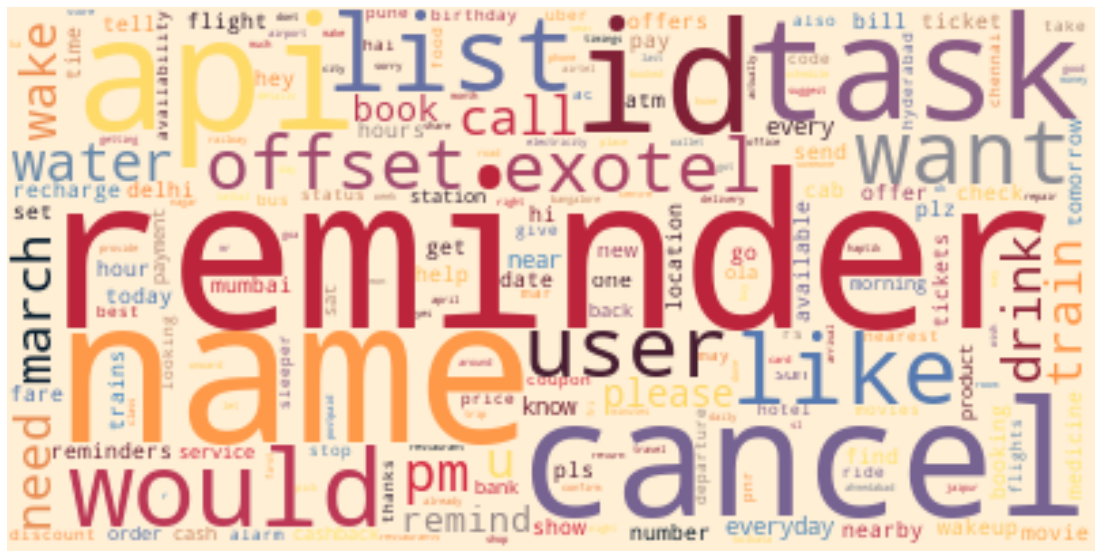

In [11]:
hero.wordcloud(filtered_df["message"].pipe(hero.clean))

# PCA

In [12]:
filtered_df['pca'] = (
    filtered_df['message']
   .pipe(hero.clean)
   .pipe(hero.tfidf)
   .pipe(hero.pca)
)

In [13]:
hero.scatterplot(filtered_df, 'pca', color='travel', title="PCA Travel Messages")